In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from pylab import *

%matplotlib inline

from pandas import DataFrame

In [20]:
from sklearn.linear_model import LassoCV, MultiTaskLassoCV
from math import sqrt

In [10]:
df = pd.read_csv("energy_efficiency.csv")
col=[10,11]
df.drop(df.columns[col], axis=1, inplace=True)
df.dropna(how="all", inplace=True)

In [11]:
yCols = [8,9]

X = df.drop(["Y1", "Y2"], axis=1)
X = np.array(X)

y = df[["Y1", "Y2"]]
y = np.array(y)

#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.1)

In [12]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [13]:
#normalization

nrows = len(X)
ncols = len(X[0])

xMeans = []
xStd = []
for i in range(ncols):
    col = [X[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    xMeans.append(mean)
    colDiff = [(X[j][i] - mean) for j in range(nrows)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrows)])
    stdDev = sqrt(sumSq/nrows)
    xStd.append(stdDev)
    
xNormalized = []
for i in range(nrows):
    rowNormalized = [(X[i][j] - xMeans[j] ) /xStd[j] for j in range(ncols)]
    xNormalized.append(rowNormalized)
    
ycols=len(y[0])
yMeans = []
yStd = []

for i in range(ycols):
    col = [y[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    yMeans.append(mean)
    colDiff = [(y[j][i] - mean) for j in range(nrows)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrows)])
    stdDev = sqrt(sumSq/nrows)
    yStd.append(stdDev)
    

# yMeans = sum(y)/nrows
# yStd = sqrt(sum([(y[i] - yMean)*(y[i] - yMean) for i in range(nrows)])/nrows)

yNormalized = []
for i in range(nrows):
    rowNormalized  = [(y[i][j] - yMeans[j])/ yStd[j] for j in range(ycols)]
    yNormalized.append(rowNormalized)   
    
print(nrows, ncols)

768 8


In [18]:
#Using CV feature of Lasso Model to estimate testing error

#Unnormalized X, Unnormalized Y

clf = LassoCV(cv=10).fit(X, y)

ValueError: For multi-task outputs, use MultiTaskLassoCV

Alpha value that minimizes the CV error:  0.811477862201
Minimum MSE:  19.8474655956


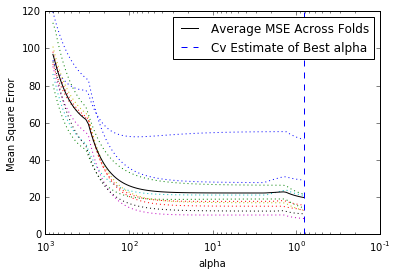

In [35]:
#apparently since we have two outputs, we need to use multitask lassoCV
#Unnormalized X, Unnormalized y

clf = MultiTaskLassoCV(cv=10).fit(X, y)
plt.plot(clf.alphas_, clf.mse_path_, ":")
plt.plot(clf.alphas_, clf.mse_path_.mean(axis=-1), label="Average MSE Across Folds", linewidth=1, c='k')
plt.axvline(clf.alpha_, linestyle="--", label="Cv Estimate of Best alpha")
plt.semilogx()
plt.legend()
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel('alpha')
plt.ylabel('Mean Square Error')
#plt.axis('tight')

print("Alpha value that minimizes the CV error: ",clf.alpha_)
print("Minimum MSE: ", min(clf.mse_path_.mean(axis=-1)))


Alpha value that minimizes the CV error:  0.0123679082101
Minimum MSE:  10.2571853171


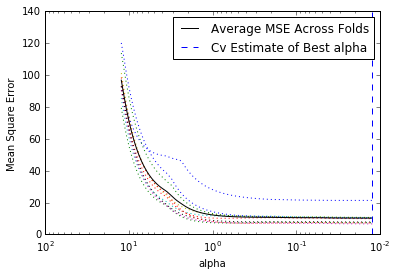

In [37]:
#normalized X, unnormalized y

clf2 = MultiTaskLassoCV(cv=10).fit(xNormalized, y)
plt.plot(clf2.alphas_, clf2.mse_path_, ":")
plt.plot(clf2.alphas_, clf2.mse_path_.mean(axis=-1), label="Average MSE Across Folds", linewidth=1, c='k')
plt.axvline(clf2.alpha_, linestyle="--", label="Cv Estimate of Best alpha")
plt.semilogx()
plt.legend()
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel('alpha')
plt.ylabel('Mean Square Error')
#plt.axis('tight')

print("Alpha value that minimizes the CV error: ",clf2.alpha_)
print("Minimum MSE: ", min(clf2.mse_path_.mean(axis=-1)))

Alpha value that minimizes the CV error:  0.00126234622542
Minimum MSE:  0.107403376461


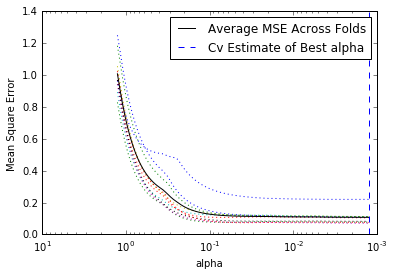

In [38]:
#normalized X, normalized y

clf3 = MultiTaskLassoCV(cv=10).fit(xNormalized, yNormalized)
plt.plot(clf3.alphas_, clf3.mse_path_, ":")
plt.plot(clf3.alphas_, clf3.mse_path_.mean(axis=-1), label="Average MSE Across Folds", linewidth=1, c='k')
plt.axvline(clf3.alpha_, linestyle="--", label="Cv Estimate of Best alpha")
plt.semilogx()
plt.legend()
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel('alpha')
plt.ylabel('Mean Square Error')
#plt.axis('tight')

print("Alpha value that minimizes the CV error: ",clf3.alpha_)
print("Minimum MSE: ", min(clf3.mse_path_.mean(axis=-1)))

In [51]:
#Lasso Modelling on the entire dataset

alphas, coefs, _ = linear_model.MultiTaskLasso.path(xNormalized, yNormalized, return_models=False)
# plt.plot(alphas, coefs.T)
# plt.xlabel("alpha")
# plt.ylabel("Coefficients")
# plt.axis("tight")
# plt.semilogx()
# ax = plt.gca()
# ax.invert_xaxis()

In [58]:
_, nattr, nalpha = coefs.shape

nzList = []
for i in range(1, nalpha):
    coefList = list(coefs[:,i])
    nzCoef = [j for j in range(nattr) if coefList[j] != 0.0]
    for q in nzCoef:
        if not(q in nzList):
            nzList.append(q)
            
nameList = [names[nzList[i]] for i in range(len(nzList))]
print("Attributes Ordered by How Early They Enter the Model", nameList)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [62]:
coefs.shape

(2, 8, 100)